## Captura e Visualização de dados

<b>Professor:</b> Diénert Vieira
<b>Telefone:</b> (83) 9 8182-1479
<b>Email:</b> dienertalencar@gmail.com

### Segunda avaliação de aprendizagem

Depois de extrairmos os dados bancários, passamos para a sua análise. Podemos detectar padrões de comportamentos e gerar visualizações que nos auxiliem na tomada de decisões.

### Tarefa 03
#### Explorar os dados obtidos, gerar visualizações e obter insights

Primeiro importamos a biblioteca de manipulação de dados: Pandas. E usamos um alias (apelido): pd, por brevidade:

In [120]:
import pandas as pd

Depois podemos listar os arquivos do diretório:

In [121]:
import os
os.listdir("../../")

['2018-04.ofx',
 'av1_1.json',
 'av1_2.json',
 'avaliacao_1_1.py',
 'avaliacao_1_2.py',
 'conta.ofx',
 'expensesv2',
 'mes.json',
 'teste.py',
 'tudo.csv',
 'tudo.json',
 '__pycache__']

Um dataframe é uma estrutura de dados tabular de duas dimensões (linhas e coluns). Um linha ou coluna consiste em uma série na biblioteca Pandas. A linha a seguir transforma o nosso arquivo gerado no exercício anterior em um dataframe, assim podemos executar operações sobre ele como em um banco de dados.

In [122]:
df = pd.read_json("../../tudo.json")

Podemos visualizar o dataframe, apenas exibindo o valor da variável 'df', ou usando os métodos .head(n) para as primeiras 'n' linhas ou .tail(n) para as últimas 'n' linhas. Experimente cada um.

In [123]:
df.head()

,date,descricao,valor,referencia
0,2018-03-09,Repasse pagamento: 17223405 de Jorge Teixeira,"74,40",2018-04-29
1,2018-03-09,Tarifa repasse: 17223405 de Jorge Teixeira,"-3,34",2018-04-29
2,2018-03-20,Repasse pagamento: 22612776 de Paulo Jorge Alves,"74,40",2018-04-29
3,2018-03-20,Tarifa repasse: 22612776 de Paulo Jorge Alves,"-3,34",2018-04-29
4,2018-03-30,Repasse pagamento: 28015595 de Fulano Aguiar,"74,40",2018-04-29


In [124]:
df.iloc[5:8]

,date,descricao,valor,referencia
5,2018-03-30,Tarifa repasse: 28015595 de Fulano Aguiar,"-3,34",2018-04-29
6,2018-04-06,Repasse pagamento: 28108174 de Ciclano da Silva,"65,10",2018-04-29
7,2018-04-06,Tarifa repasse: 28108174 de Ciclano da Silva,"-3,34",2018-04-29


Para tratarmos as datas de forma apropriada, convertemos as strings para o formato apropriado. Acessamos uma coluna ou série, do dataframe usando .nome_da_coluna ou [nome_da_coluna]. Com isso podemos ver o tipo de cada coluna. Vemos que date já está no formato de data, mas a data de referência está como O de Object, ou seja, string.

In [125]:
df.date.dtype

dtype('<M8[ns]')

In [126]:
df.referencia.dtype

dtype('O')

Convertemos para data da seguinte forma:

In [127]:
dateformat = '%Y/%m/%d'

df['date'] = pd.to_datetime(df['date'], format=dateformat)
df['referencia'] = pd.to_datetime(df['referencia'], format=dateformat)

Conferindo a conversão:

In [128]:
df.referencia.dtype

dtype('<M8[ns]')

Com isso, podemos por exemplo, ordenar todo o dataframe pela data.

Saber a data mínima:

In [129]:
df.date.min()

Timestamp('2018-03-09 00:00:00')

Saber a data máxima:

In [130]:
df.date.max()

Timestamp('2018-04-29 00:00:00')

Colocar a data no índice para transformar o dataframe em séries temporais

In [131]:
df.index = df.date

In [132]:
df = df.drop(columns='date')

In [133]:
df

,descricao,valor,referencia
date,,,
2018-03-09,Repasse pagamento: 17223405 de Jorge Teixeira,"74,40",2018-04-29
2018-03-09,Tarifa repasse: 17223405 de Jorge Teixeira,"-3,34",2018-04-29
2018-03-20,Repasse pagamento: 22612776 de Paulo Jorge Alves,"74,40",2018-04-29
2018-03-20,Tarifa repasse: 22612776 de Paulo Jorge Alves,"-3,34",2018-04-29
2018-03-30,Repasse pagamento: 28015595 de Fulano Aguiar,"74,40",2018-04-29
2018-03-30,Tarifa repasse: 28015595 de Fulano Aguiar,"-3,34",2018-04-29
2018-04-06,Repasse pagamento: 28108174 de Ciclano da Silva,"65,10",2018-04-29
2018-04-06,Tarifa repasse: 28108174 de Ciclano da Silva,"-3,34",2018-04-29
2018-04-16,Repasse pagamento: 29384993 de Jorge Amado,"74,40",2018-04-29


Ordenando o daframe pelo índice (o padrão é na ordem crescente)

In [134]:
df = df.sort_index()
#df = df.sort_valeu(['date','valor'], ascending = FALSE) #Listar pelo valor decrescente
df

,descricao,valor,referencia
date,,,
2018-03-09,Repasse pagamento: 17223405 de Jorge Teixeira,"74,40",2018-04-29
2018-03-09,Repasse pagamento: 17223405 de Jorge Teixeira,"74,40",2018-04-29
2018-03-09,Tarifa repasse: 17223405 de Jorge Teixeira,"-3,34",2018-04-29
2018-03-09,Tarifa repasse: 17223405 de Jorge Teixeira,"-3,34",2018-04-29
2018-03-20,Tarifa repasse: 22612776 de Paulo Jorge Alves,"-3,34",2018-04-29
2018-03-20,Repasse pagamento: 22612776 de Paulo Jorge Alves,"74,40",2018-04-29
2018-03-20,Tarifa repasse: 22612776 de Paulo Jorge Alves,"-3,34",2018-04-29
2018-03-20,Repasse pagamento: 22612776 de Paulo Jorge Alves,"74,40",2018-04-29
2018-03-30,Repasse pagamento: 28015595 de Fulano Aguiar,"74,40",2018-04-29


Salvando o arquivo para CSV para visualizar todos os dados no Libre Office

In [135]:
df.to_csv('../../tudo.csv')

Podemos também usar a função 'filtra_e_soma' para encontrar algo específico contido na descrição, sem necessariamente informar toda a descrição

In [136]:
def filtra_e_soma(df, descricao):
    filtrado = df[df.descricao.str.lower().str.count(descricao) > 0]
    print('Soma: ', filtrado.valor.sum())
    return filtrado.copy()

In [137]:
spotify = filtra_e_soma(df, 'Repasse ')

Soma:  0


In [138]:
spotify

,descricao,valor,referencia
date,,,


Podemos gerar um histograma para visualizar a distribuição dos valores

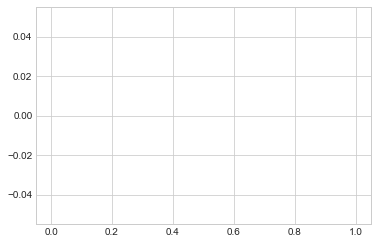

In [139]:
spotify.valor.hist(bins=50)

In [140]:
uber = filtra_e_soma(df, 'uber')

Soma:  0


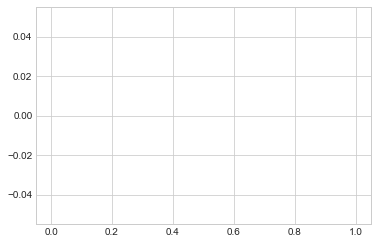

In [141]:
uber.valor.hist()

Podemos gerar o boxplot, para vermos a mediana e os outlies

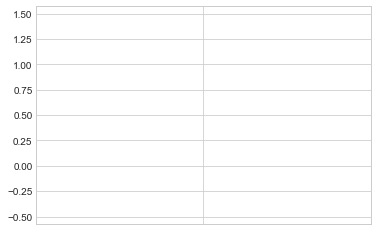

In [142]:
uber.boxplot()

In [143]:
uber

,descricao,valor,referencia
date,,,


Vamos usar a primeira biblioteca de visualziação, além do pandas, o Matplotlib

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [145]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [146]:
def plota_linha1(x, y, titulo, inverte=True):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    ax = plt.axes()
    x = x
    y = y * (-1 if inverte else 1)
    ax.set(title = titulo, 
           xlabel='Tempo',
           ylabel='Gasto R$')
    ax.plot(x, y);

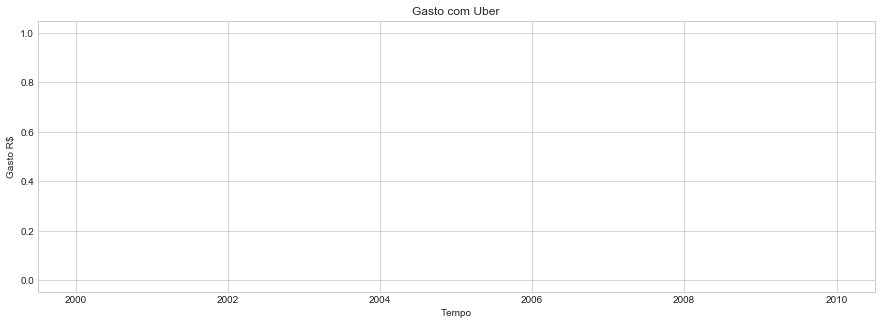

In [147]:
plota_linha1(uber.index, uber.valor, 'Gasto com Uber')

Agora vamos usar uma biblioteca mais rebuscada, a Plotly

In [148]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plota_linha(x, y, titulo, inverte=True):
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Scatter(x=x, y=y * (-1 if inverte else 1), mode='lines+markers')]

    layout = dict(
        title=titulo,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all',
                         label='Tudo',)
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date',

        ),
        #barmode='stack'
    )

    fig = dict(data=data, layout=layout)

    plotly.offline.iplot(fig)

In [149]:
def filtra_soma_plota(df, palavra, titulo, inverte=True):
    filtro = filtra_e_soma(df, palavra)
    plota_linha(filtro.index, filtro.valor, titulo)
    return filtro

In [150]:
filtra_soma_plota(df, '^posto ', 'Gasto com abastecimentos')

Soma:  0


,descricao,valor,referencia
date,,,


In [151]:
filtra_soma_plota(df, 'uber', 'Gasto com abastecimentos')

Soma:  0


,descricao,valor,referencia
date,,,


In [152]:
filtra_soma_plota(df, 'iof', 'IOF')

Soma:  0


,descricao,valor,referencia
date,,,


In [153]:
faturas = filtra_soma_plota(df, 'pgto', 'Faturas do Cartão de Crédito', inverte=False)

Soma:  0


In [154]:
faturas = df[df.descricao.str.lower().str.count('pgto') == 0].groupby('referencia')['valor'].sum()
faturas

referencia
2018-04-29    74,4074,40-3,34-3,34-3,3474,40-3,3474,4074,40-...
Name: valor, dtype: object

In [155]:
plota_linha(faturas.index, faturas.values*-1, 'Gastos Totais')

## Tarefa 03 Concluída